# Logistic Regression for Multiclass Classification

# Here we do Hand Written Digits Recognition

## 1. Import all usefull libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Import Datasets 

In [2]:
from sklearn.datasets import load_digits  # it load hand written digits datasets 
digits = load_digits()

## 3. Have a view on our dataset

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

### we use 'data' and 'target' here to train our model

In [4]:
digits.data[0] # it gives color coding of 0

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

## to view the image

<Figure size 432x288 with 0 Axes>

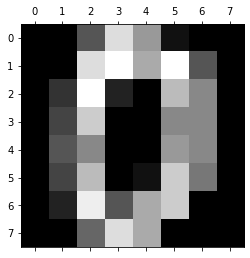

In [5]:
plt.gray()
plt.matshow(digits.images[0])

In [6]:
digits.target[0:5]  # it shows first five numbers in our datasets

array([0, 1, 2, 3, 4])

## 4. Train Test Splitting of our Datasets

In [7]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(digits.data , digits.target ,test_size=0.2)

## 5. Import our Model and fit data in it

In [8]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)

In [9]:
model.fit(x_train , y_train)

RandomForestClassifier(n_estimators=20)

## 6. Testing of our model

In [10]:
model.predict([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

array([0])

In [11]:
model.score(x_test , y_test)

0.95

In [12]:
digits.target[67]

6

In [13]:
## now check what our model gives
model.predict([digits.data[67]])

array([6])

In [14]:
model.predict(digits.data[0:20])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## 7. Lets Check where our model fails

#   To do so we use confusion_matrix

In [15]:
y_predicted = model.predict(x_test) # it give result sample of what our model gives
y_actual = y_test

### import Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_actual , y_predicted)
cm

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  3,  0,  1,  0,  0],
       [ 0,  1,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  1,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  1],
       [ 0,  2,  1,  0,  0,  0,  0,  1, 24,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 32]], dtype=int64)

## For better Visualization ,
## We use Seaborn library (it is similar to matplotlib)

Text(69.0, 0.5, 'Truth')

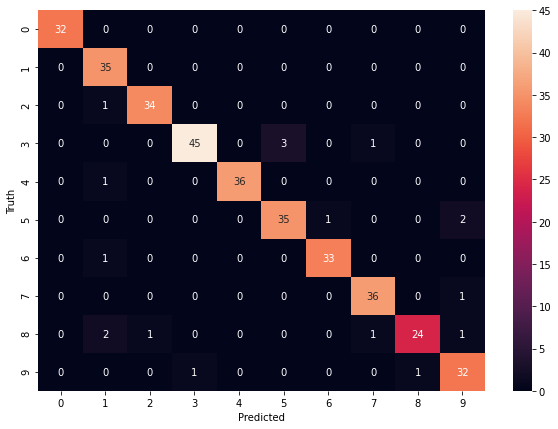

In [17]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm , annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')